# Automates et machines séquentielles

Nous avons séparées les tâches au sein de la class `Automata` :

- la classe `Automata` ne contient que le code de l'automate ;
- la classe `SequentialAutomate` hérite de cette classe et implémente les automates ou machines séquentielles ;
- un design pattern décorateur permet d'ajouter des fonctionnalités aux classes précédentes ;
- ces classes ont été décorées en deux classes : `DotAutomata` et `DotSequentialAutomata` ajoutant la fonctionnalité de pouvoir être affiché par `graphviz` (format `dot`).

## automates et langages 

Utilisons la classe `Automata` pour une machine, dont l'état permet de déterminer le reste de la division par 2 :


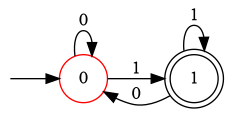

In [14]:
from dot_automata import DotAutomata
from dot import Dot
automate = DotAutomata(0, {1})
automate[0]['0'] = 0
automate[0]['1'] = 1
automate[1]['0'] = 0
automate[1]['1'] = 1
Dot(automate)

**rq** : il faut utiliser la fonction `Dot` sur l'objet du type `DotAutomata` pour générer le graphique.


L'automate précédent permet de vérifier un nombre, fournit en entrée par son écriture binaire, est impair.
Il s'agit d'un problème de décision, associé au langage des mots binaires représentation des entiers impairs :

In [15]:
for i in range(10):
    automate.reset()
    if automate.accept(bin(i)[2:]):
        print(f"{i} est accepté par l'automate")
    else:
        print(f"{i} n'est pas accepté par l'automate")

0 n'est pas accepté par l'automate
1 est accepté par l'automate
2 n'est pas accepté par l'automate
3 est accepté par l'automate
4 n'est pas accepté par l'automate
5 est accepté par l'automate
6 n'est pas accepté par l'automate
7 est accepté par l'automate
8 n'est pas accepté par l'automate
9 est accepté par l'automate


**à faire** créer l'automate du cours à 5 états qui reconnait les mots binaires représentations des entiers congrus à 1 modulo 5.

**à faire** écrire une fonction `cree_automate_reste` renvoyant l'automate reconnaissant la classe des mots binaires représentation d'entiers congrus à $r$ modulo $n$ :

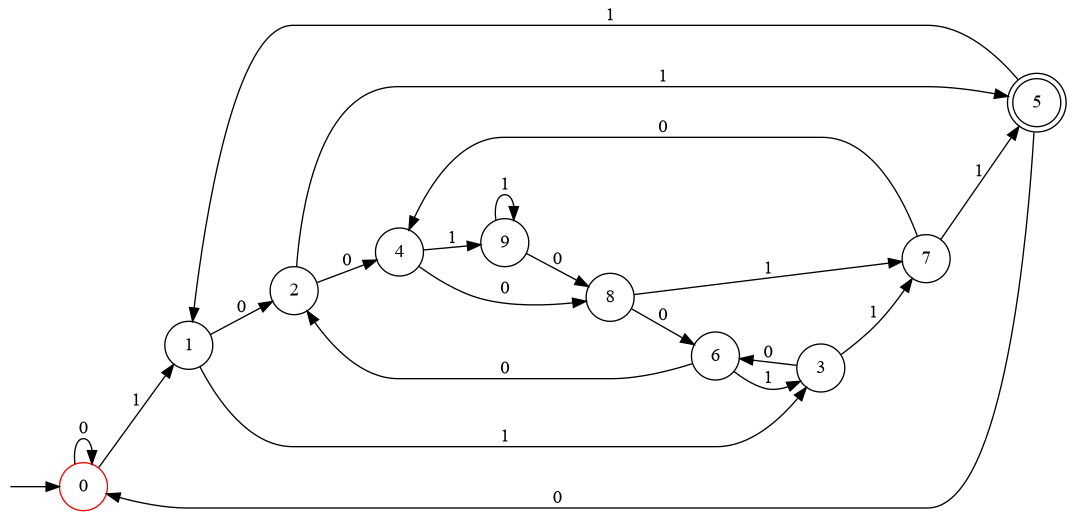

In [10]:
def cree_automate_reste(n: int, r: int) -> DotAutomata:
    """
    renvoie un automate reconnaissant le langage des mots binaires représentation
    des entiers congru à r modulo n

    précondition 0<=r < n
    """
    ...

Dot(cree_automate_reste(10, 5))


## les automates séquentiels

les automates séquentiels, ou machines séquentielles, sont un premier modèle permettant d'associer à un mot d'un alphabet d'entrée, un mot d'un alphabet de sortie.

Il s'agit d'associer à chaque changement d'état une lettre, considérée comme la sortie.

On ajoute donc à la classe `Automata` :
- la possibilité d'associer à un couple `(etat, lettre lu)` un couple `(etat_suivant, lettre_imprimée)` ;
- une méthode `output` qui renvoie le mot construit depuis le dernier appel à la fonction `reset_output` ;
- une méthode `reset_output` qui initialise la sortie au mot vide.


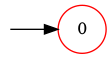

In [1]:
from dot_automata import DotSequentialAutomata
from dot import Dot

machine = DotSequentialAutomata(0)
Dot(machine)


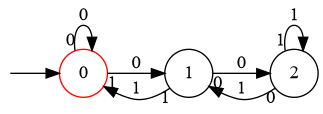

In [2]:
machine[(0, '0')] = (0, '0') 
machine[(0, '1')] = (1, '0')
machine[(1, '0')] = (2, '0')
machine[(1, '1')] = (0, '1')
machine[(2, '0')] = (1, '1')
machine[(2, '1')] = (2, '1')
Dot(machine)

la classe `SequentialAutomata` permet d'avancer dans les état en fournissant un symbole :

In [3]:
machine.state()

0

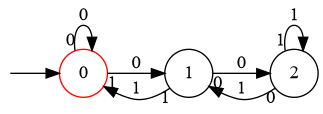

In [4]:
machine.next('0')
Dot(machine)

In [5]:
machine.output()

'0'

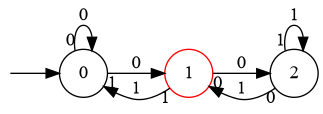

In [6]:
machine.next('1')
Dot(machine)

In [7]:
machine.state()

1

In [8]:
machine.output()

'00'

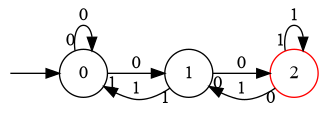

In [9]:
machine.next('0').next('1')
Dot(machine)

In [10]:
machine.state()

2

In [11]:
machine.output()

'0001'

In [12]:
for k in range(20):
    machine.reset()
    machine.accept(bin(k)[2:])
    print(f"pour le mot {bin(k)[2:]}, la machine se trouve dans l'état {machine.state()} en ayant imprimé {machine.output()}")

pour le mot 0, la machine se trouve dans l'état 0 en ayant imprimé 0
pour le mot 1, la machine se trouve dans l'état 1 en ayant imprimé 0
pour le mot 10, la machine se trouve dans l'état 2 en ayant imprimé 00
pour le mot 11, la machine se trouve dans l'état 0 en ayant imprimé 01
pour le mot 100, la machine se trouve dans l'état 1 en ayant imprimé 001
pour le mot 101, la machine se trouve dans l'état 2 en ayant imprimé 001
pour le mot 110, la machine se trouve dans l'état 0 en ayant imprimé 010
pour le mot 111, la machine se trouve dans l'état 1 en ayant imprimé 010
pour le mot 1000, la machine se trouve dans l'état 2 en ayant imprimé 0010
pour le mot 1001, la machine se trouve dans l'état 0 en ayant imprimé 0011
pour le mot 1010, la machine se trouve dans l'état 1 en ayant imprimé 0011
pour le mot 1011, la machine se trouve dans l'état 2 en ayant imprimé 0011
pour le mot 1100, la machine se trouve dans l'état 0 en ayant imprimé 0100
pour le mot 1101, la machine se trouve dans l'état 1 

**question** Que permet de calculer cette machine ?

Voici la démonstration de ce fait pour l'état 1. Désignons par $m$ le mot en entrée qui nous a permis d'arriver à l'état 1, et $s$ le mot en sortie jusqu'ici produit.
- si $\overline{m}_2= 3q+1$, alors :
     1. $\overline{s}_2 = q$ (c'est le quotient qui est imprimé)
        et donc  $\overline{m}_2 = 3\overline{s}_2+1$ 
     3. $\overline{m0}_2=6q+2=3(2q)+2=3\overline{s0}_2+2$
        - on se retrouve donc dans l'état 2 en imprimant un 0 supplémentaire
     4. $\overline{m1}_2=6q+2+1 = 6q+3 = 3(2q+1) = 3\overline{s1}_2+0$
        - on se retrouve donc dans l'état 0 en imprimant un 1 supplémentaire.
       
**question** rédiger la démonstration pour l'état 2.


**question** completer la fonction `machine_diviseur` pour qu'elle renvoie la machine séquentielle effectuant la division par `n`

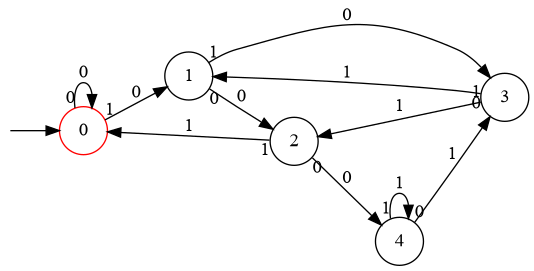

In [13]:
def machine_diviseur(n: int):
    """Renvoie la machine effectuant la division par n."""
    ...

Dot(machine_diviseur(5))